---
## Step 0: Load The Data

In [1]:
import tensorflow as tf
import keras
import pickle

Using TensorFlow backend.


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
validation_file= "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Print the shape of variables
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)


(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training example
n_train = X_train.shape[0]
n_train1 = X_train.shape[1]
n_train2 = X_train.shape[2]
n_train3 = X_train.shape[3]

# TODO: Number of validation example
n_validation = X_valid.shape[0]

# TODO: Number of testing example.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
#x=set(y_train)
#print(x)
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("height =", n_train1)
print("width =", n_train2)
print("channels =",n_train3)
print("\nNumber of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
height = 32
width = 32
channels = 3

Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import random
from PIL import Image, ImageEnhance
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load name of id
with open("signnames.csv", "r") as f:
    signnames = f.read()
   # print(signnames)
id_to_name = { int(line.split(",")[0]):line.split(",")[1] for line in signnames.split("\n")[1:] if len(line) > 0}

#print(id_to_name)

In [5]:
graph_size = 3
print(X_train.shape[0])
print(random.randint(0, X_train.shape[0]))
random_index_list = [random.randint(0, X_train.shape[0]) for _ in range(graph_size * graph_size)]
print(random_index_list)

34799
27610
[15556, 15370, 2642, 6570, 30886, 13016, 27584, 12084, 10601]


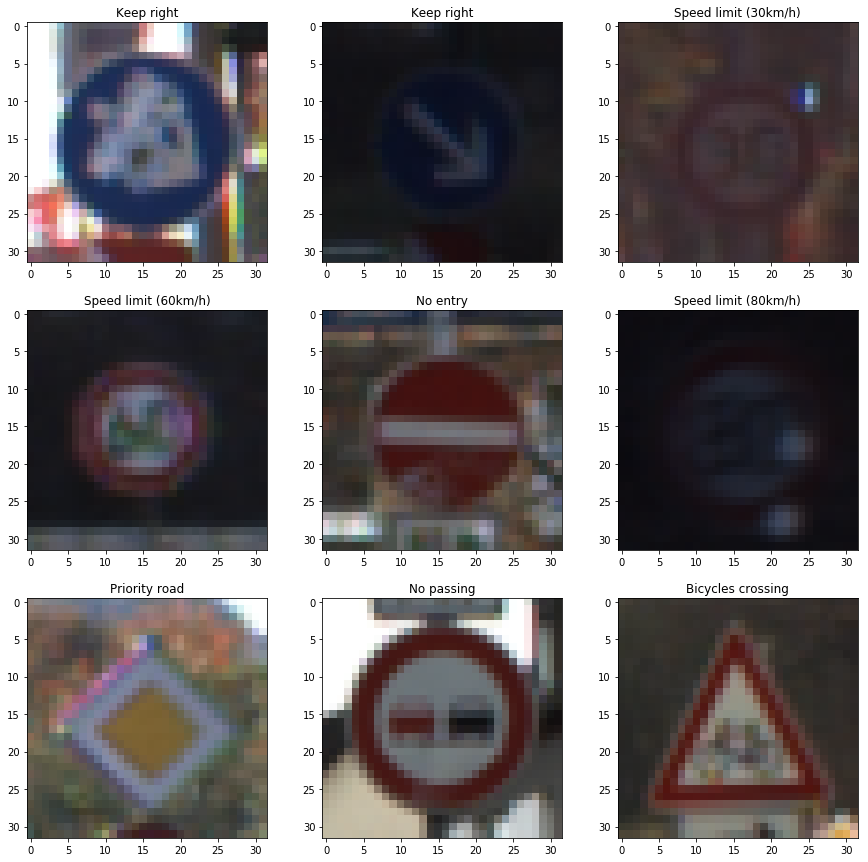

In [7]:
#print(index)
#print(X_train[index])
#print(np.rollaxis(X_train[index] * 255, 0,3))
fig = plt.figure(figsize=(15, 15))
for i, index in enumerate(random_index_list):
    #print(i,index)
    #print(id_to_name[y_train[index]])
    a=fig.add_subplot(graph_size, graph_size, i+1)
    #print(a)
    imgplot = plt.imshow(X_train[index])
    #Plot some images
    a.set_title('%s' % id_to_name[y_train[index]])

plt.show()

Most common index
index: 2 => Speed limit (50km/h) = 0.0591355252409
index: 1 => Speed limit (30km/h) = 0.0582529054612
index: 13 => Yield = 0.0564876659017
index: 12 => Priority road = 0.055605046122
index: 38 => Keep right = 0.0547224263423
index: 10 => No passing for vehicles over 3.5 metric tons = 0.0529571867829
index: 4 => Speed limit (70km/h) = 0.0520745670032
index: 5 => Speed limit (80km/h) = 0.0485440878843
index: 25 => Road work = 0.0397178900872
index: 9 => No passing = 0.0388352703074


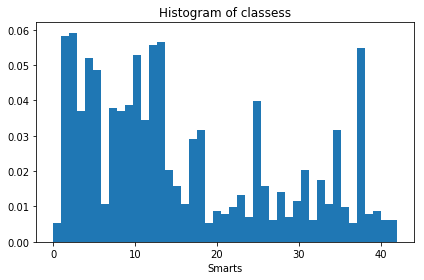

In [6]:
fig, ax = plt.subplots()
#print(fig,ax)
# the histogram of the data
values, bins, patches = ax.hist(y_train, n_classes, normed=10)

# add a 'best fit' line
ax.set_xlabel('Smarts')
ax.set_title(r'Histogram of classess')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

print ("Most common index")
most_common_index = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
for index in most_common_index[:10]:
    print("index: %s => %s = %s" % (index, id_to_name[index], values[index]))

    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#  I used keras only for the ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator


X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255



In [16]:
def preprocessing_function(img):
    """
        Custom preprocessing_function
    """
    img = img * 255
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    img = ImageEnhance.Brightness(img).enhance(random.uniform(0.6, 1.5))
    img = ImageEnhance.Contrast(img).enhance(random.uniform(0.6, 1.5))

    return np.array(img) / 255

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

train_datagen = ImageDataGenerator()
train_datagen_augmented = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocessing_function)
inference_datagen = ImageDataGenerator()
train_datagen.fit(X_train)
train_datagen_augmented.fit(X_train)
inference_datagen.fit(X_valid)
inference_datagen.fit(X_test)

### Example of augmented images

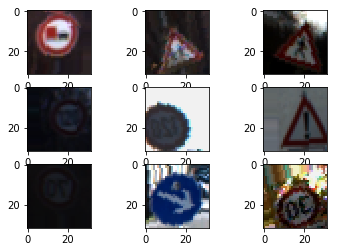

In [20]:
fig = plt.figure()

n = 0

graph_size = 3

for x_batch, y_batch in train_datagen_augmented.flow(X_train, y_train, batch_size=1):
    a=fig.add_subplot(graph_size, graph_size, n+1)
    imgplot = plt.imshow(x_batch[0])
    n = n + 1
    if n > 8:
        break

    
plt.show()


## Model Architecture

### CapsNet

In [7]:
import numpy as np
import tensorflow as tf
import numpy as np


def conv_caps_layer(input_layer, capsules_size, nb_filters, kernel, stride=2):
    """
        Capsule layer for the convolutional inputs
        **input:
            *input_layer: (Tensor)
            *capsule_numbers: (Integer) the number of capsule in this layer.
            *kernel_size: (Integer) Size of the kernel for each filter.
            *stride: (Integer) 2 by default
    """
    # "In convolutional capsule layers each unit in a capsule is a convolutional unit.
    # Therefore, each capsule will output a grid of vectors rather than a single vector output."
    capsules = tf.contrib.layers.conv2d(
        input_layer, nb_filters * capsules_size, kernel, stride, padding="VALID")
    # conv shape: [?, kernel, kernel, nb_filters]
    shape = capsules.get_shape().as_list()
    capsules = tf.reshape(capsules, shape=(-1, np.prod(shape[1:3]) * nb_filters, capsules_size, 1))
    # capsules shape: [?, nb_capsules, capsule_size, 1]
    return squash(capsules)

def routing(u_hat, b_ij, nb_capsules, nb_capsules_p, iterations=4):
    """
        Routing algorithm

        **input:
            *u_hat: Dot product (weights between previous capsule and current capsule)
            *b_ij: the log prior probabilities that capsule i should be coupled to capsule j
            *nb_capsules_p: Number of capsule in the previous layer
            *nb_capsules: Number of capsule in this layer
    """
    # Start the routing algorithm
    for it in range(iterations):
        with tf.variable_scope('routing_' + str(it)):
            # Line 4 of algo
            # probabilities that capsule i should be coupled to capsule j.
            # c_ij:  [nb_capsules_p, nb_capsules, 1, 1]
            c_ij = tf.nn.softmax(b_ij, dim=2)

            # Line 5 of algo
            # c_ij:  [      nb_capsules_p, nb_capsules, 1,         1]
            # u_hat: [?,    nb_capsules_p, nb_capsules, len_v_j,   1]
            s_j = tf.multiply(c_ij, u_hat)
            # s_j: [?, nb_capsules_p, nb_capsules, len_v_j, 1]
            s_j = tf.reduce_sum(s_j, axis=1, keep_dims=True)
            # s_j: [?, 1, nb_capsules, len_v_j, 1)

            # line 6:
            # squash using Eq.1,
            v_j = squash(s_j)
            # v_j: [1, 1, nb_capsules, len_v_j, 1)

            # line 7:
            # Frist reshape & tile v_j
            # [? ,  1,              nb_capsules,    len_v_j, 1] ->
            # [?,   nb_capsules_p,  nb_capsules,    len_v_j, 1]
            v_j_tiled = tf.tile(v_j, [1, nb_capsules_p, 1, 1, 1])
            # u_hat:    [?,             nb_capsules_p, nb_capsules, len_v_j, 1]
            # v_j_tiled [1,             nb_capsules_p, nb_capsules, len_v_j, 1]
            u_dot_v = tf.matmul(u_hat, v_j_tiled, transpose_a=True)
            # u_produce_v: [?, nb_capsules_p, nb_capsules, 1, 1]
            b_ij += tf.reduce_sum(u_dot_v, axis=0, keep_dims=True)
            #b_ih: [1, nb_capsules_p, nb_capsules, 1, 1]

    return tf.squeeze(v_j, axis=1)

def fully_connected_caps_layer(input_layer, capsules_size, nb_capsules, iterations=4):
    """
        Second layer receiving inputs from all capsules of the layer below
            **input:
                *input_layer: (Tensor)
                *capsules_size: (Integer) Size of each capsule
                *nb_capsules: (Integer) Number of capsule
                *iterations: (Integer) Number of iteration for the routing algorithm

            i refer to the layer below.
            j refer to the layer above (the current layer).
    """
    shape = input_layer.get_shape().as_list()
    # Get the size of each capsule in the previous layer and the current layer.
    len_u_i = np.prod(shape[2])
    len_v_j = capsules_size
    # Get the number of capsule in the layer bellow.
    nb_capsules_p = np.prod(shape[1])

    # w_ij: Used to compute u_hat by multiplying the output ui of a capsule in the layer below
    # with this matrix
    # [nb_capsules_p, nb_capsules, len_v_j, len_u_i]
    _init = tf.random_normal_initializer(stddev=0.01, seed=0)
    _shape = (nb_capsules_p, nb_capsules, len_v_j, len_u_i)
    w_ij = tf.get_variable('weight', shape=_shape, dtype=tf.float32, initializer=_init)

    # Adding one dimension to the input [batch_size, nb_capsules_p,    length(u_i), 1] ->
    #                                   [batch_size, nb_capsules_p, 1, length(u_i), 1]
    # To allow the next dot product
    input_layer = tf.reshape(input_layer, shape=(-1, nb_capsules_p, 1, len_u_i, 1))
    input_layer = tf.tile(input_layer, [1, 1, nb_capsules, 1, 1])

    # Eq.2, calc u_hat
    # Prediction uj|i made by capsule i
    # w_ij:  [              nb_capsules_p, nb_capsules, len_v_j,  len_u_i, ]
    # input: [batch_size,   nb_capsules_p, nb_capsules, len_ui,   1]
    # u_hat: [batch_size,   nb_capsules_p, nb_capsules, len_v_j, 1]
    # Each capsule of the previous layer capsule layer is associated to a capsule of this layer
    u_hat = tf.einsum('abdc,iabcf->iabdf', w_ij, input_layer)

    # bij are the log prior probabilities that capsule i should be coupled to capsule j
    # [nb_capsules_p, nb_capsules, 1, 1]
    b_ij = tf.zeros(shape=[nb_capsules_p, nb_capsules, 1, 1], dtype=np.float32)

    return routing(u_hat, b_ij, nb_capsules, nb_capsules_p, iterations=iterations)

def squash(vector):
    """
        Squashing function corresponding to Eq. 1
        **input: **
            *vector
    """
    vector += 0.00001 # Workaround for the squashing function ...
    vec_squared_norm = tf.reduce_sum(tf.square(vector), -2, keep_dims=True)
    scalar_factor = vec_squared_norm / (1 + vec_squared_norm) / tf.sqrt(vec_squared_norm)
    vec_squashed = scalar_factor * vector  # element-wise
    return(vec_squashed)


### Main Model

In [8]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
from model_base import ModelBase
import tensorflow as tf

class ModelTrafficSign(ModelBase):
    """
        ModelTrafficSign.
        This class is used to create the conv graph using:
            Dynamic Routing Between Capsules
    """

    # Numbers of label to predict
    NB_LABELS = 43

    def __init__(self, model_name, output_folder):
        """
            **input:
                *model_name: (Integer) Name of this model
                *output_folder: Output folder to saved data (tensorboard, checkpoints)
        """
        ModelBase.__init__(self, model_name, output_folder=output_folder)

    def _build_inputs(self):
        """
            Build tensorflow inputs
            (Placeholder)
            **return: **
                *tf_images: Images Placeholder
                *tf_labels: Labels Placeholder
        """
        # Images 32*32*3
        tf_images = tf.placeholder(tf.float32, [None, 32, 32, 3], name='images')
        # Labels: [0, 1, 6, 20, ...]
        tf_labels = tf.placeholder(tf.int64, [None], name='labels')
        return tf_images, tf_labels

    def _build_main_network(self, images, conv_2_dropout):
        """
            This method is used to create the two convolutions and the CapsNet on the top
            **input:
                *images: Image PLaceholder
                *conv_2_dropout: Dropout value placeholder
            **return: **
                *Caps1: Output of first Capsule layer
                *Caps2: Output of second Capsule layer
        """
        # First BLock:
        # Layer 1: Convolution.
        shape = (self.h.conv_1_size, self.h.conv_1_size, 3, self.h.conv_1_nb)
        conv1 = self._create_conv(self.tf_images, shape, relu=True, max_pooling=False, padding='VALID')
        # Layer 2: Convolution.
        #shape = (self.h.conv_2_size, self.h.conv_2_size, self.h.conv_1_nb, self.h.conv_2_nb)
        #conv2 = self._create_conv(conv1, shape, relu=True, max_pooling=False, padding='VALID')
        conv1 = tf.nn.dropout(conv1, keep_prob=conv_2_dropout)

        # Create the first capsules layer
        caps1 = conv_caps_layer(
            input_layer=conv1,
            capsules_size=self.h.caps_1_vec_len,
            nb_filters=self.h.caps_1_nb_filter,
            kernel=self.h.caps_1_size)
        # Create the second capsules layer used to predict the output
        caps2 = fully_connected_caps_layer(
            input_layer=caps1,
            capsules_size=self.h.caps_2_vec_len,
            nb_capsules=self.NB_LABELS,
            iterations=self.h.routing_steps)

        return caps1, caps2

    def _build_decoder(self, caps2, one_hot_labels, batch_size):
        """
            Build the decoder part from the last capsule layer
            **input:
                *Caps2:  Output of second Capsule layer
                *one_hot_labels
                *batch_size
        """
        labels = tf.reshape(one_hot_labels, (-1, self.NB_LABELS, 1))
        # squeeze(caps2):   [?, len_v_j,    capsules_nb]
        # labels:           [?, NB_LABELS,  1] with capsules_nb == NB_LABELS
        mask = tf.matmul(tf.squeeze(caps2), labels, transpose_a=True)
        # Select the good capsule vector
        capsule_vector = tf.reshape(mask, shape=(batch_size, self.h.caps_2_vec_len))
        # capsule_vector: [?, len_v_j]

        # Reconstruct image
        fc1 = tf.contrib.layers.fully_connected(capsule_vector, num_outputs=400)
        fc1 = tf.reshape(fc1, shape=(batch_size, 5, 5, 16))
        upsample1 = tf.image.resize_nearest_neighbor(fc1, (8, 8))
        conv1 = tf.layers.conv2d(upsample1, 4, (3,3), padding='same', activation=tf.nn.relu)

        upsample2 = tf.image.resize_nearest_neighbor(conv1, (16, 16))
        conv2 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)

        upsample3 = tf.image.resize_nearest_neighbor(conv2, (32, 32))
        conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)

        # 3 channel for RGG
        logits = tf.layers.conv2d(conv6, 3, (3,3), padding='same', activation=None)
        decoded = tf.nn.sigmoid(logits, name='decoded')
        tf.summary.image('reconstruction_img', decoded)

        return decoded

    def init(self):
        """
            Init the graph
        """
        # Get graph inputs
        self.tf_images, self.tf_labels = self._build_inputs()
        # Dropout inputs
        self.tf_conv_2_dropout = tf.placeholder(tf.float32, shape=(), name='conv_2_dropout')
        # Dynamic batch size
        batch_size = tf.shape(self.tf_images)[0]
        # Translate labels to one hot array
        one_hot_labels = tf.one_hot(self.tf_labels, depth=self.NB_LABELS)
        # Create the first convolution and the CapsNet
        self.tf_caps1, self.tf_caps2 = self._build_main_network(self.tf_images, self.tf_conv_2_dropout)

        # Build the images reconstruction
        self.tf_decoded = self._build_decoder(self.tf_caps2, one_hot_labels, batch_size)

        # Build the loss
        _loss = self._build_loss(
            self.tf_caps2, one_hot_labels, self.tf_labels, self.tf_decoded, self.tf_images)
        (self.tf_loss_squared_rec, self.tf_margin_loss_sum, self.tf_predicted_class,
         self.tf_correct_prediction, self.tf_accuracy, self.tf_loss, self.tf_margin_loss,
         self.tf_reconstruction_loss) = _loss

        # Build optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate=self.h.learning_rate)
        self.tf_optimizer = optimizer.minimize(self.tf_loss, global_step=tf.Variable(0, trainable=False))

        # Log value into tensorboard
        tf.summary.scalar('margin_loss', self.tf_margin_loss)
        tf.summary.scalar('accuracy', self.tf_accuracy)
        tf.summary.scalar('total_loss', self.tf_loss)
        tf.summary.scalar('reconstruction_loss', self.tf_reconstruction_loss)

        self.tf_test = tf.random_uniform([2], minval=0, maxval=None, dtype=tf.float32, seed=None, name="tf_test")

        self.init_session()


    def _build_loss(self, caps2, one_hot_labels, labels, decoded, images):
        """
            Build the loss of the graph
        """
        # Get the length of each capsule
        capsules_length = tf.sqrt(tf.reduce_sum(tf.square(caps2), axis=2, keep_dims=True))

        max_l = tf.square(tf.maximum(0., 0.9 - capsules_length))
        max_l = tf.reshape(max_l, shape=(-1, self.NB_LABELS))
        max_r = tf.square(tf.maximum(0., capsules_length - 0.1))
        max_r = tf.reshape(max_r, shape=(-1, self.NB_LABELS))
        t_c = one_hot_labels
        m_loss = t_c * max_l + 0.5 * (1 - t_c) * max_r
        margin_loss_sum = tf.reduce_sum(m_loss, axis=1)
        margin_loss = tf.reduce_mean(margin_loss_sum)

        # Reconstruction loss
        loss_squared_rec = tf.square(decoded - images)
        reconstruction_loss = tf.reduce_mean(loss_squared_rec)

        # 3. Total loss
        loss = margin_loss + (0.0005 * reconstruction_loss)

        # Accuracy
        predicted_class = tf.argmax(capsules_length, axis=1)
        predicted_class = tf.reshape(predicted_class, [tf.shape(capsules_length)[0]])
        correct_prediction = tf.equal(predicted_class, labels)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        return (loss_squared_rec, margin_loss_sum, predicted_class, correct_prediction, accuracy,
                loss, margin_loss, reconstruction_loss)

    def optimize(self, images, labels, tb_save=True):
        """
            Train the model
            **input: **
                *images: Image to train the model on
                *labels: True classes
                *tb_save: (Boolean) Log this optimization in tensorboard
            **return: **
                Loss: The loss of the model on this batch
                Acc: Accuracy of the model on this batch
        """
        tensors = [self.tf_optimizer, self.tf_margin_loss, self.tf_accuracy, self.tf_tensorboard]
        _, loss, acc, summary = self.sess.run(tensors,
            feed_dict={
            self.tf_images: images,
            self.tf_labels: labels,
            self.tf_conv_2_dropout: self.h.conv_2_dropout
        })

        if tb_save:
            # Write data to tensorboard
            self.train_writer.add_summary(summary, self.train_writer_it)
            self.train_writer_it += 1

        return loss, acc

    def evaluate(self, images, labels, tb_train_save=False, tb_test_save=False):
        """
            Evaluate dataset
            **input: **
                *images: Image to train the model on
                *labels: True classes
                *tb_train_save: (Boolean) Log this optimization in tensorboard under the train part
                *tb_test_save: (Boolean) Log this optimization in tensorboard under the test part
            **return: **
                Loss: The loss of the model on this batch
                Acc: Accuracy of the model on this batch
        """
        tensors = [self.tf_margin_loss, self.tf_accuracy, self.tf_tensorboard]
        loss, acc, summary = self.sess.run(tensors,
                feed_dict={
                self.tf_images: images,
                self.tf_labels: labels,
                self.tf_conv_2_dropout: 1.
            })

        if tb_test_save:
            # Write data to tensorboard
            self.test_writer.add_summary(summary, self.test_writer_it)
            self.test_writer_it += 1

        if tb_train_save:
            # Write data to tensorboard
            self.train_writer.add_summary(summary, self.train_writer_it)
            self.train_writer_it += 1

        return loss, acc

    def predict(self, images):
        """
            Method used to predict a class
            Return a softmax
            **input: **
                *images: Image to train the model on
            **return:
                *softmax: Softmax between all capsules
        """
        tensors = [self.tf_caps2]

        caps2 = self.sess.run(tensors,
            feed_dict={
            self.tf_images: images,
            self.tf_conv_2_dropout: 1.
        })[0]

        # tf.sqrt(tf.reduce_sum(tf.square(caps2), axis=2, keep_dims=True))
        caps2 = np.sqrt(np.sum(np.square(caps2), axis=2, keepdims=True))
        caps2 = np.reshape(caps2, (len(images), self.NB_LABELS))
        # softmax
        softmax = np.exp(caps2) / np.sum(np.exp(caps2), axis=1, keepdims=True)

        return softmax

    def reconstruction(self, images, labels):
        """
            Method used to get the reconstructions given a batch
            Return the result as a softmax
            **input: **
                *images: Image to train the model on
                *labels: True classes
        """
        tensors = [self.tf_decoded]

        decoded = self.sess.run(tensors,
            feed_dict={
            self.tf_images: images,
            self.tf_labels: labels,
            self.tf_conv_2_dropout: 1.
        })[0]

        return decoded

    def evaluate_dataset(self, images, labels, batch_size=10):
        """
            Evaluate a full dataset
            This method is used to fully evaluate the dataset batch per batch. Useful when
            the dataset can't be fit inside to the GPU.
            *input: **
                *images: Image to train the model on
                *labels: True classes
            *return: **
                *loss: Loss overall your dataset
                *accuracy: Accuracy overall your dataset
                *predicted_class: Predicted class
        """
        tensors = [self.tf_loss_squared_rec, self.tf_margin_loss_sum, self.tf_correct_prediction,
                   self.tf_predicted_class]

        loss_squared_rec_list = None
        margin_loss_sum_list = None
        correct_prediction_list = None
        predicted_class = None

        b = 0
        for batch in self.get_batches([images, labels], batch_size, shuffle=False):
            images_batch, labels_batch = batch
            loss_squared_rec, margin_loss_sum, correct_prediction, classes = self.sess.run(tensors,
                feed_dict={
                self.tf_images: images_batch,
                self.tf_labels: labels_batch,
                self.tf_conv_2_dropout: 1.
            })
            if loss_squared_rec_list is not None:
                predicted_class = np.concatenate((predicted_class, classes))
                loss_squared_rec_list = np.concatenate((loss_squared_rec_list, loss_squared_rec))
                margin_loss_sum_list = np.concatenate((margin_loss_sum_list, margin_loss_sum))
                correct_prediction_list = np.concatenate((correct_prediction_list, correct_prediction))
            else:
                predicted_class = classes
                loss_squared_rec_list = loss_squared_rec
                margin_loss_sum_list = margin_loss_sum
                correct_prediction_list = correct_prediction
            b += batch_size

        margin_loss = np.mean(margin_loss_sum_list)
        reconstruction_loss = np.mean(loss_squared_rec_list)
        accuracy = np.mean(correct_prediction_list)

        loss = margin_loss

        return loss, accuracy, predicted_class


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
# Init model
model = ModelTrafficSign("TrafficSign", output_folder="outputs")
model.init()

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

BATCH_SIZE = 20

# Utils method to print the current progression
def plot_progression(b, cost, acc, label): print(
    "[%s] Batch ID = %s, loss = %s, acc = %s" % (label, b, cost, acc))

# Training pipeline
b = 0
valid_batch = inference_datagen.flow(X_valid, y_valid, batch_size=BATCH_SIZE)
best_validation_loss = None
augmented_factor = 0.99
decrease_factor = 0.90
train_batches = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
augmented_train_batches = train_datagen_augmented.flow(X_train, y_train, batch_size=BATCH_SIZE)

while True:
    next_batch = next(
        augmented_train_batches if random.uniform(0, 1) < augmented_factor else train_batches)
    x_batch, y_batch = next_batch

    ### Training
    cost, acc = model.optimize(x_batch, y_batch)
    ### Validation
    x_batch, y_batch = next(valid_batch, None)
    # Retrieve the cost and acc on this validation batch and save it in tensorboard
    cost_val, acc_val = model.evaluate(x_batch, y_batch, tb_test_save=True)

    if b % 10 == 0: # Plot the last results
        plot_progression(b, cost, acc, "Train")
        plot_progression(b, cost_val, acc_val, "Validation")
    if b % 1000 == 0: # Test the model on all the validation
        print("Evaluate full validation dataset ...")
        loss, acc, _ = model.evaluate_dataset(X_valid, y_valid)
        print("Current loss: %s Best loss: %s" % (loss, best_validation_loss))
        plot_progression(b, loss, acc, "TOTAL Validation")
        if best_validation_loss is None or loss < best_validation_loss:
            best_validation_loss = loss
            model.save()
        augmented_factor = augmented_factor * decrease_factor
        print("Augmented Factor = %s" % augmented_factor)

    b += 1


  

[Train] Batch ID = 0, loss = 4.74837, acc = 0.1
[Validation] Batch ID = 0, loss = 1.30745, acc = 0.0
Evaluate full validation dataset ...


ModelBase::Saving model ...


Current loss: 1.66561 Best loss: None
[TOTAL Validation] Batch ID = 0, loss = 1.66561, acc = 0.0362811791383


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.891
[Train] Batch ID = 10, loss = 0.772367, acc = 0.0
[Validation] Batch ID = 10, loss = 0.761044, acc = 0.0
[Train] Batch ID = 20, loss = 0.69243, acc = 0.0
[Validation] Batch ID = 20, loss = 0.707551, acc = 0.1
[Train] Batch ID = 30, loss = 0.677132, acc = 0.05
[Validation] Batch ID = 30, loss = 0.650949, acc = 0.05
[Train] Batch ID = 40, loss = 0.64718, acc = 0.0
[Validation] Batch ID = 40, loss = 0.650047, acc = 0.0
[Train] Batch ID = 50, loss = 0.647577, acc = 0.0
[Validation] Batch ID = 50, loss = 0.674937, acc = 0.0
[Train] Batch ID = 60, loss = 0.612541, acc = 0.0
[Validation] Batch ID = 60, loss = 0.644607, acc = 0.05
[Train] Batch ID = 70, loss = 0.631378, acc = 0.05
[Validation] Batch ID = 70, loss = 0.604939, acc = 0.0
[Train] Batch ID = 80, loss = 0.614625, acc = 0.05
[Validation] Batch ID = 80, loss = 0.629868, acc = 0.05
[Train] Batch ID = 90, loss = 0.624713, acc = 0.0
[Validation] Batch ID = 90, loss = 0.606071, acc = 0.1
[Train] Batch ID = 100, lo

ModelBase::Saving model ...


Current loss: 0.527947 Best loss: 1.66561
[TOTAL Validation] Batch ID = 1000, loss = 0.527947, acc = 0.274376417234


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.8019000000000001
[Train] Batch ID = 1010, loss = 0.529695, acc = 0.35
[Validation] Batch ID = 1010, loss = 0.537693, acc = 0.2
[Train] Batch ID = 1020, loss = 0.496418, acc = 0.3
[Validation] Batch ID = 1020, loss = 0.508547, acc = 0.35
[Train] Batch ID = 1030, loss = 0.495084, acc = 0.25
[Validation] Batch ID = 1030, loss = 0.447802, acc = 0.45
[Train] Batch ID = 1040, loss = 0.546013, acc = 0.25
[Validation] Batch ID = 1040, loss = 0.468095, acc = 0.4
[Train] Batch ID = 1050, loss = 0.502313, acc = 0.3
[Validation] Batch ID = 1050, loss = 0.513724, acc = 0.4
[Train] Batch ID = 1060, loss = 0.567872, acc = 0.15
[Validation] Batch ID = 1060, loss = 0.562233, acc = 0.2
[Train] Batch ID = 1070, loss = 0.525321, acc = 0.15
[Validation] Batch ID = 1070, loss = 0.560865, acc = 0.25
[Train] Batch ID = 1080, loss = 0.56157, acc = 0.15
[Validation] Batch ID = 1080, loss = 0.535219, acc = 0.15
[Train] Batch ID = 1090, loss = 0.564543, acc = 0.1
[Validation] Batch ID = 1090,

ModelBase::Saving model ...


Current loss: 0.40183 Best loss: 0.527947
[TOTAL Validation] Batch ID = 2000, loss = 0.40183, acc = 0.52335600907


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.7217100000000001
[Train] Batch ID = 2010, loss = 0.501406, acc = 0.25
[Validation] Batch ID = 2010, loss = 0.403945, acc = 0.55
[Train] Batch ID = 2020, loss = 0.54693, acc = 0.2
[Validation] Batch ID = 2020, loss = 0.367657, acc = 0.45
[Train] Batch ID = 2030, loss = 0.522012, acc = 0.15
[Validation] Batch ID = 2030, loss = 0.448189, acc = 0.3
[Train] Batch ID = 2040, loss = 0.495045, acc = 0.5
[Validation] Batch ID = 2040, loss = 0.479955, acc = 0.4
[Train] Batch ID = 2050, loss = 0.517704, acc = 0.25
[Validation] Batch ID = 2050, loss = 0.377689, acc = 0.55
[Train] Batch ID = 2060, loss = 0.483532, acc = 0.35
[Validation] Batch ID = 2060, loss = 0.445081, acc = 0.35
[Train] Batch ID = 2070, loss = 0.412294, acc = 0.4
[Validation] Batch ID = 2070, loss = 0.407733, acc = 0.5
[Train] Batch ID = 2080, loss = 0.506725, acc = 0.35
[Validation] Batch ID = 2080, loss = 0.333587, acc = 0.7
[Train] Batch ID = 2090, loss = 0.346719, acc = 0.7
[Validation] Batch ID = 2090, 

ModelBase::Saving model ...


Current loss: 0.322056 Best loss: 0.40183
[TOTAL Validation] Batch ID = 3000, loss = 0.322056, acc = 0.666666666667


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.6495390000000001
[Train] Batch ID = 3010, loss = 0.50714, acc = 0.3
[Validation] Batch ID = 3010, loss = 0.354684, acc = 0.55
[Train] Batch ID = 3020, loss = 0.2942, acc = 0.7
[Validation] Batch ID = 3020, loss = 0.284374, acc = 0.75
[Train] Batch ID = 3030, loss = 0.484614, acc = 0.3
[Validation] Batch ID = 3030, loss = 0.415417, acc = 0.3
[Train] Batch ID = 3040, loss = 0.472613, acc = 0.4
[Validation] Batch ID = 3040, loss = 0.302852, acc = 0.65
[Train] Batch ID = 3050, loss = 0.522973, acc = 0.25
[Validation] Batch ID = 3050, loss = 0.358148, acc = 0.5
[Train] Batch ID = 3060, loss = 0.306473, acc = 0.65
[Validation] Batch ID = 3060, loss = 0.351191, acc = 0.65
[Train] Batch ID = 3070, loss = 0.442586, acc = 0.45
[Validation] Batch ID = 3070, loss = 0.301997, acc = 0.8
[Train] Batch ID = 3080, loss = 0.300633, acc = 0.6
[Validation] Batch ID = 3080, loss = 0.312947, acc = 0.65
[Train] Batch ID = 3090, loss = 0.44603, acc = 0.45
[Validation] Batch ID = 3090, los

ModelBase::Saving model ...


Current loss: 0.270844 Best loss: 0.322056
[TOTAL Validation] Batch ID = 4000, loss = 0.270844, acc = 0.732199546485


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.5845851000000001
[Train] Batch ID = 4010, loss = 0.512168, acc = 0.35
[Validation] Batch ID = 4010, loss = 0.200947, acc = 0.9
[Train] Batch ID = 4020, loss = 0.456527, acc = 0.3
[Validation] Batch ID = 4020, loss = 0.253173, acc = 0.6
[Train] Batch ID = 4030, loss = 0.283722, acc = 0.7
[Validation] Batch ID = 4030, loss = 0.19471, acc = 0.8
[Train] Batch ID = 4040, loss = 0.453704, acc = 0.45
[Validation] Batch ID = 4040, loss = 0.331457, acc = 0.65
[Train] Batch ID = 4050, loss = 0.440655, acc = 0.45
[Validation] Batch ID = 4050, loss = 0.304683, acc = 0.6
[Train] Batch ID = 4060, loss = 0.439413, acc = 0.45
[Validation] Batch ID = 4060, loss = 0.281261, acc = 0.75
[Train] Batch ID = 4070, loss = 0.445925, acc = 0.5
[Validation] Batch ID = 4070, loss = 0.284234, acc = 0.7
[Train] Batch ID = 4080, loss = 0.485594, acc = 0.4
[Validation] Batch ID = 4080, loss = 0.305289, acc = 0.75
[Train] Batch ID = 4090, loss = 0.480136, acc = 0.45
[Validation] Batch ID = 4090, l

ModelBase::Saving model ...


Current loss: 0.234846 Best loss: 0.270844
[TOTAL Validation] Batch ID = 5000, loss = 0.234846, acc = 0.787074829932


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.5261265900000001
[Train] Batch ID = 5010, loss = 0.499492, acc = 0.25
[Validation] Batch ID = 5010, loss = 0.259705, acc = 0.75
[Train] Batch ID = 5020, loss = 0.218884, acc = 0.85
[Validation] Batch ID = 5020, loss = 0.231945, acc = 0.75
[Train] Batch ID = 5030, loss = 0.457332, acc = 0.4
[Validation] Batch ID = 5030, loss = 0.257684, acc = 0.8
[Train] Batch ID = 5040, loss = 0.201693, acc = 0.85
[Validation] Batch ID = 5040, loss = 0.237945, acc = 0.75
[Train] Batch ID = 5050, loss = 0.509861, acc = 0.35
[Validation] Batch ID = 5050, loss = 0.302031, acc = 0.8
[Train] Batch ID = 5060, loss = 0.457325, acc = 0.45
[Validation] Batch ID = 5060, loss = 0.235769, acc = 0.85
[Train] Batch ID = 5070, loss = 0.148365, acc = 0.95
[Validation] Batch ID = 5070, loss = 0.200009, acc = 0.85
[Train] Batch ID = 5080, loss = 0.476247, acc = 0.45
[Validation] Batch ID = 5080, loss = 0.230565, acc = 0.8
[Train] Batch ID = 5090, loss = 0.161954, acc = 0.9
[Validation] Batch ID = 50

ModelBase::Saving model ...


Current loss: 0.195813 Best loss: 0.234846
[TOTAL Validation] Batch ID = 6000, loss = 0.195813, acc = 0.844897959184


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.47351393100000005
[Train] Batch ID = 6010, loss = 0.192418, acc = 0.9
[Validation] Batch ID = 6010, loss = 0.198678, acc = 0.8
[Train] Batch ID = 6020, loss = 0.386563, acc = 0.4
[Validation] Batch ID = 6020, loss = 0.164154, acc = 0.9
[Train] Batch ID = 6030, loss = 0.452483, acc = 0.45
[Validation] Batch ID = 6030, loss = 0.241978, acc = 0.8
[Train] Batch ID = 6040, loss = 0.175043, acc = 0.9
[Validation] Batch ID = 6040, loss = 0.18518, acc = 0.8
[Train] Batch ID = 6050, loss = 0.407202, acc = 0.55
[Validation] Batch ID = 6050, loss = 0.172964, acc = 0.9
[Train] Batch ID = 6060, loss = 0.132715, acc = 0.95
[Validation] Batch ID = 6060, loss = 0.234798, acc = 0.8
[Train] Batch ID = 6070, loss = 0.153946, acc = 1.0
[Validation] Batch ID = 6070, loss = 0.24693, acc = 0.75
[Train] Batch ID = 6080, loss = 0.128325, acc = 1.0
[Validation] Batch ID = 6080, loss = 0.263765, acc = 0.7
[Train] Batch ID = 6090, loss = 0.165925, acc = 0.8
[Validation] Batch ID = 6090, loss 

ModelBase::Saving model ...


Current loss: 0.179093 Best loss: 0.195813
[TOTAL Validation] Batch ID = 7000, loss = 0.179093, acc = 0.878911564626


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.4261625379000001
[Train] Batch ID = 7010, loss = 0.398574, acc = 0.55
[Validation] Batch ID = 7010, loss = 0.194709, acc = 0.9
[Train] Batch ID = 7020, loss = 0.423867, acc = 0.45
[Validation] Batch ID = 7020, loss = 0.2257, acc = 0.85
[Train] Batch ID = 7030, loss = 0.506663, acc = 0.3
[Validation] Batch ID = 7030, loss = 0.187762, acc = 0.9
[Train] Batch ID = 7040, loss = 0.121818, acc = 0.95
[Validation] Batch ID = 7040, loss = 0.254331, acc = 0.8
[Train] Batch ID = 7050, loss = 0.402469, acc = 0.45
[Validation] Batch ID = 7050, loss = 0.183248, acc = 0.9
[Train] Batch ID = 7060, loss = 0.129659, acc = 0.95
[Validation] Batch ID = 7060, loss = 0.192996, acc = 0.85
[Train] Batch ID = 7070, loss = 0.114336, acc = 1.0
[Validation] Batch ID = 7070, loss = 0.18913, acc = 0.85
[Train] Batch ID = 7080, loss = 0.165823, acc = 0.9
[Validation] Batch ID = 7080, loss = 0.263517, acc = 0.7
[Train] Batch ID = 7090, loss = 0.40066, acc = 0.65
[Validation] Batch ID = 7090, los

ModelBase::Saving model ...


Current loss: 0.156227 Best loss: 0.179093
[TOTAL Validation] Batch ID = 8000, loss = 0.156227, acc = 0.900453514739


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.3835462841100001
[Train] Batch ID = 8010, loss = 0.378981, acc = 0.65
[Validation] Batch ID = 8010, loss = 0.143862, acc = 0.95
[Train] Batch ID = 8020, loss = 0.112697, acc = 0.95
[Validation] Batch ID = 8020, loss = 0.122175, acc = 0.9
[Train] Batch ID = 8030, loss = 0.110941, acc = 0.95
[Validation] Batch ID = 8030, loss = 0.18596, acc = 0.75
[Train] Batch ID = 8040, loss = 0.0967056, acc = 0.95
[Validation] Batch ID = 8040, loss = 0.176528, acc = 0.85
[Train] Batch ID = 8050, loss = 0.422032, acc = 0.5
[Validation] Batch ID = 8050, loss = 0.0995345, acc = 1.0
[Train] Batch ID = 8060, loss = 0.390368, acc = 0.65
[Validation] Batch ID = 8060, loss = 0.235804, acc = 0.7
[Train] Batch ID = 8070, loss = 0.438563, acc = 0.45
[Validation] Batch ID = 8070, loss = 0.184231, acc = 0.85
[Train] Batch ID = 8080, loss = 0.114479, acc = 0.95
[Validation] Batch ID = 8080, loss = 0.144567, acc = 0.95
[Train] Batch ID = 8090, loss = 0.0697369, acc = 1.0
[Validation] Batch ID = 

ModelBase::Saving model ...


Current loss: 0.138203 Best loss: 0.156227
[TOTAL Validation] Batch ID = 9000, loss = 0.138203, acc = 0.914285714286


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.34519165569900007
[Train] Batch ID = 9010, loss = 0.0737849, acc = 0.95
[Validation] Batch ID = 9010, loss = 0.155062, acc = 0.85
[Train] Batch ID = 9020, loss = 0.447968, acc = 0.35
[Validation] Batch ID = 9020, loss = 0.171975, acc = 0.85
[Train] Batch ID = 9030, loss = 0.414579, acc = 0.5
[Validation] Batch ID = 9030, loss = 0.148166, acc = 0.9
[Train] Batch ID = 9040, loss = 0.399762, acc = 0.4
[Validation] Batch ID = 9040, loss = 0.112452, acc = 1.0
[Train] Batch ID = 9050, loss = 0.0749303, acc = 1.0
[Validation] Batch ID = 9050, loss = 0.187996, acc = 0.85
[Train] Batch ID = 9060, loss = 0.346644, acc = 0.6
[Validation] Batch ID = 9060, loss = 0.0927557, acc = 1.0
[Train] Batch ID = 9070, loss = 0.434105, acc = 0.4
[Validation] Batch ID = 9070, loss = 0.146859, acc = 0.9
[Train] Batch ID = 9080, loss = 0.111676, acc = 1.0
[Validation] Batch ID = 9080, loss = 0.174754, acc = 0.8
[Train] Batch ID = 9090, loss = 0.40869, acc = 0.55
[Validation] Batch ID = 9090,

ModelBase::Saving model ...


Current loss: 0.122456 Best loss: 0.138203
[TOTAL Validation] Batch ID = 10000, loss = 0.122456, acc = 0.916553287982


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.3106724901291001
[Train] Batch ID = 10010, loss = 0.0823528, acc = 1.0
[Validation] Batch ID = 10010, loss = 0.111079, acc = 0.95
[Train] Batch ID = 10020, loss = 0.421535, acc = 0.45
[Validation] Batch ID = 10020, loss = 0.127613, acc = 0.95
[Train] Batch ID = 10030, loss = 0.0729117, acc = 0.95
[Validation] Batch ID = 10030, loss = 0.131132, acc = 0.85
[Train] Batch ID = 10040, loss = 0.438604, acc = 0.4
[Validation] Batch ID = 10040, loss = 0.124319, acc = 0.95
[Train] Batch ID = 10050, loss = 0.0610263, acc = 1.0
[Validation] Batch ID = 10050, loss = 0.132168, acc = 0.95
[Train] Batch ID = 10060, loss = 0.0735278, acc = 0.95
[Validation] Batch ID = 10060, loss = 0.128398, acc = 0.9
[Train] Batch ID = 10070, loss = 0.509695, acc = 0.3
[Validation] Batch ID = 10070, loss = 0.141128, acc = 0.95
[Train] Batch ID = 10080, loss = 0.332466, acc = 0.6
[Validation] Batch ID = 10080, loss = 0.138852, acc = 0.85
[Train] Batch ID = 10090, loss = 0.384137, acc = 0.5
[Valida

ModelBase::Saving model ...


Current loss: 0.112468 Best loss: 0.122456
[TOTAL Validation] Batch ID = 11000, loss = 0.112468, acc = 0.934693877551


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.27960524111619006
[Train] Batch ID = 11010, loss = 0.0596427, acc = 1.0
[Validation] Batch ID = 11010, loss = 0.0632493, acc = 1.0
[Train] Batch ID = 11020, loss = 0.123778, acc = 0.9
[Validation] Batch ID = 11020, loss = 0.15951, acc = 0.9
[Train] Batch ID = 11030, loss = 0.412455, acc = 0.55
[Validation] Batch ID = 11030, loss = 0.118589, acc = 0.95
[Train] Batch ID = 11040, loss = 0.0988737, acc = 1.0
[Validation] Batch ID = 11040, loss = 0.116688, acc = 0.95
[Train] Batch ID = 11050, loss = 0.388655, acc = 0.5
[Validation] Batch ID = 11050, loss = 0.125753, acc = 0.9
[Train] Batch ID = 11060, loss = 0.066444, acc = 1.0
[Validation] Batch ID = 11060, loss = 0.157177, acc = 0.85
[Train] Batch ID = 11070, loss = 0.0643831, acc = 1.0
[Validation] Batch ID = 11070, loss = 0.106013, acc = 0.95
[Train] Batch ID = 11080, loss = 0.0663049, acc = 1.0
[Validation] Batch ID = 11080, loss = 0.0728082, acc = 0.95
[Train] Batch ID = 11090, loss = 0.0882531, acc = 0.95
[Valida

ModelBase::Saving model ...


Current loss: 0.101578 Best loss: 0.112468
[TOTAL Validation] Batch ID = 12000, loss = 0.101578, acc = 0.945351473923


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.2516447170045711
[Train] Batch ID = 12010, loss = 0.0876267, acc = 0.95
[Validation] Batch ID = 12010, loss = 0.146934, acc = 0.95
[Train] Batch ID = 12020, loss = 0.0643046, acc = 1.0
[Validation] Batch ID = 12020, loss = 0.0727709, acc = 0.95
[Train] Batch ID = 12030, loss = 0.445391, acc = 0.45
[Validation] Batch ID = 12030, loss = 0.0811681, acc = 1.0
[Train] Batch ID = 12040, loss = 0.40899, acc = 0.55
[Validation] Batch ID = 12040, loss = 0.105822, acc = 0.9
[Train] Batch ID = 12050, loss = 0.087554, acc = 1.0
[Validation] Batch ID = 12050, loss = 0.102147, acc = 0.95
[Train] Batch ID = 12060, loss = 0.485265, acc = 0.35
[Validation] Batch ID = 12060, loss = 0.0492594, acc = 1.0
[Train] Batch ID = 12070, loss = 0.401569, acc = 0.5
[Validation] Batch ID = 12070, loss = 0.0555281, acc = 1.0
[Train] Batch ID = 12080, loss = 0.425015, acc = 0.55
[Validation] Batch ID = 12080, loss = 0.114615, acc = 0.9
[Train] Batch ID = 12090, loss = 0.0292646, acc = 1.0
[Valida

ModelBase::Saving model ...


Current loss: 0.0955421 Best loss: 0.101578
[TOTAL Validation] Batch ID = 13000, loss = 0.0955421, acc = 0.949206349206


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.22648024530411398
[Train] Batch ID = 13010, loss = 0.0503791, acc = 1.0
[Validation] Batch ID = 13010, loss = 0.0982536, acc = 0.9
[Train] Batch ID = 13020, loss = 0.0544654, acc = 1.0
[Validation] Batch ID = 13020, loss = 0.0777491, acc = 0.95
[Train] Batch ID = 13030, loss = 0.0657435, acc = 1.0
[Validation] Batch ID = 13030, loss = 0.0902024, acc = 0.95
[Train] Batch ID = 13040, loss = 0.394499, acc = 0.65
[Validation] Batch ID = 13040, loss = 0.0829911, acc = 0.9
[Train] Batch ID = 13050, loss = 0.408284, acc = 0.6
[Validation] Batch ID = 13050, loss = 0.0376954, acc = 1.0
[Train] Batch ID = 13060, loss = 0.0659685, acc = 1.0
[Validation] Batch ID = 13060, loss = 0.0923961, acc = 0.95
[Train] Batch ID = 13070, loss = 0.075504, acc = 0.95
[Validation] Batch ID = 13070, loss = 0.0481456, acc = 1.0
[Train] Batch ID = 13080, loss = 0.0403052, acc = 1.0
[Validation] Batch ID = 13080, loss = 0.0710325, acc = 1.0
[Train] Batch ID = 13090, loss = 0.058802, acc = 1.0
[V

ModelBase::Saving model ...


Current loss: 0.0834171 Best loss: 0.0955421
[TOTAL Validation] Batch ID = 14000, loss = 0.0834171, acc = 0.956009070295


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.20383222077370258
[Train] Batch ID = 14010, loss = 0.0528335, acc = 1.0
[Validation] Batch ID = 14010, loss = 0.0847672, acc = 0.95
[Train] Batch ID = 14020, loss = 0.0444732, acc = 1.0
[Validation] Batch ID = 14020, loss = 0.0617688, acc = 1.0
[Train] Batch ID = 14030, loss = 0.04215, acc = 1.0
[Validation] Batch ID = 14030, loss = 0.0776917, acc = 1.0
[Train] Batch ID = 14040, loss = 0.0647615, acc = 1.0
[Validation] Batch ID = 14040, loss = 0.104899, acc = 0.9
[Train] Batch ID = 14050, loss = 0.0303697, acc = 1.0
[Validation] Batch ID = 14050, loss = 0.0707915, acc = 1.0
[Train] Batch ID = 14060, loss = 0.0209619, acc = 1.0
[Validation] Batch ID = 14060, loss = 0.0751621, acc = 1.0
[Train] Batch ID = 14070, loss = 0.0423426, acc = 1.0
[Validation] Batch ID = 14070, loss = 0.0844249, acc = 0.95
[Train] Batch ID = 14080, loss = 0.0714298, acc = 0.95
[Validation] Batch ID = 14080, loss = 0.07613, acc = 1.0
[Train] Batch ID = 14090, loss = 0.356637, acc = 0.55
[Vali

ModelBase::Saving model ...


Current loss: 0.0789337 Best loss: 0.0834171
[TOTAL Validation] Batch ID = 16000, loss = 0.0789337, acc = 0.95873015873


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.1651040988266991
[Train] Batch ID = 16010, loss = 0.0353077, acc = 1.0
[Validation] Batch ID = 16010, loss = 0.0595721, acc = 1.0
[Train] Batch ID = 16020, loss = 0.0261542, acc = 1.0
[Validation] Batch ID = 16020, loss = 0.0876716, acc = 0.95
[Train] Batch ID = 16030, loss = 0.0350816, acc = 1.0
[Validation] Batch ID = 16030, loss = 0.0949218, acc = 0.9
[Train] Batch ID = 16040, loss = 0.0408158, acc = 1.0
[Validation] Batch ID = 16040, loss = 0.0991571, acc = 0.95
[Train] Batch ID = 16050, loss = 0.0462519, acc = 1.0
[Validation] Batch ID = 16050, loss = 0.13255, acc = 0.9
[Train] Batch ID = 16060, loss = 0.0210365, acc = 1.0
[Validation] Batch ID = 16060, loss = 0.0455196, acc = 1.0
[Train] Batch ID = 16070, loss = 0.0480521, acc = 1.0
[Validation] Batch ID = 16070, loss = 0.0765302, acc = 0.95
[Train] Batch ID = 16080, loss = 0.442003, acc = 0.35
[Validation] Batch ID = 16080, loss = 0.0560619, acc = 1.0
[Train] Batch ID = 16090, loss = 0.037409, acc = 1.0
[Val

ModelBase::Saving model ...


Current loss: 0.0719007 Best loss: 0.0789337
[TOTAL Validation] Batch ID = 17000, loss = 0.0719007, acc = 0.959863945578


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.1485936889440292
[Train] Batch ID = 17010, loss = 0.0273065, acc = 1.0
[Validation] Batch ID = 17010, loss = 0.15855, acc = 0.85
[Train] Batch ID = 17020, loss = 0.0319995, acc = 1.0
[Validation] Batch ID = 17020, loss = 0.0332954, acc = 1.0
[Train] Batch ID = 17030, loss = 0.0260435, acc = 1.0
[Validation] Batch ID = 17030, loss = 0.03969, acc = 1.0
[Train] Batch ID = 17040, loss = 0.0277735, acc = 1.0
[Validation] Batch ID = 17040, loss = 0.0671851, acc = 0.95
[Train] Batch ID = 17050, loss = 0.0294385, acc = 1.0
[Validation] Batch ID = 17050, loss = 0.0643661, acc = 1.0
[Train] Batch ID = 17060, loss = 0.360151, acc = 0.65
[Validation] Batch ID = 17060, loss = 0.0831838, acc = 1.0
[Train] Batch ID = 17070, loss = 0.0375042, acc = 1.0
[Validation] Batch ID = 17070, loss = 0.108511, acc = 0.9
[Train] Batch ID = 17080, loss = 0.0414867, acc = 1.0
[Validation] Batch ID = 17080, loss = 0.0575123, acc = 1.0
[Train] Batch ID = 17090, loss = 0.0333895, acc = 1.0
[Valida

ModelBase::Saving model ...


Current loss: 0.0658299 Best loss: 0.0719007
[TOTAL Validation] Batch ID = 18000, loss = 0.0658299, acc = 0.966666666667


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.13373432004962627
[Train] Batch ID = 18010, loss = 0.0465346, acc = 0.95
[Validation] Batch ID = 18010, loss = 0.0563226, acc = 0.95
[Train] Batch ID = 18020, loss = 0.0332549, acc = 1.0
[Validation] Batch ID = 18020, loss = 0.048101, acc = 0.95
[Train] Batch ID = 18030, loss = 0.018963, acc = 1.0
[Validation] Batch ID = 18030, loss = 0.0768241, acc = 0.95
[Train] Batch ID = 18040, loss = 0.0242516, acc = 1.0
[Validation] Batch ID = 18040, loss = 0.073717, acc = 1.0
[Train] Batch ID = 18050, loss = 0.0247654, acc = 1.0
[Validation] Batch ID = 18050, loss = 0.0438641, acc = 1.0
[Train] Batch ID = 18060, loss = 0.033224, acc = 1.0
[Validation] Batch ID = 18060, loss = 0.0399357, acc = 1.0
[Train] Batch ID = 18070, loss = 0.0228996, acc = 1.0
[Validation] Batch ID = 18070, loss = 0.0768941, acc = 0.95
[Train] Batch ID = 18080, loss = 0.394896, acc = 0.45
[Validation] Batch ID = 18080, loss = 0.0833549, acc = 0.95
[Train] Batch ID = 18090, loss = 0.0270737, acc = 1.0
[

ModelBase::Saving model ...


Current loss: 0.0622949 Best loss: 0.0658299
[TOTAL Validation] Batch ID = 20000, loss = 0.0622949, acc = 0.963492063492


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.10832479924019728
[Train] Batch ID = 20010, loss = 0.0453177, acc = 1.0
[Validation] Batch ID = 20010, loss = 0.0591397, acc = 0.95
[Train] Batch ID = 20020, loss = 0.0307904, acc = 1.0
[Validation] Batch ID = 20020, loss = 0.0662045, acc = 0.9
[Train] Batch ID = 20030, loss = 0.024248, acc = 1.0
[Validation] Batch ID = 20030, loss = 0.0435713, acc = 1.0
[Train] Batch ID = 20040, loss = 0.0223292, acc = 1.0
[Validation] Batch ID = 20040, loss = 0.032996, acc = 1.0
[Train] Batch ID = 20050, loss = 0.0195444, acc = 1.0
[Validation] Batch ID = 20050, loss = 0.0342348, acc = 1.0
[Train] Batch ID = 20060, loss = 0.0312338, acc = 1.0
[Validation] Batch ID = 20060, loss = 0.0749149, acc = 0.9
[Train] Batch ID = 20070, loss = 0.0160742, acc = 1.0
[Validation] Batch ID = 20070, loss = 0.0425389, acc = 1.0
[Train] Batch ID = 20080, loss = 0.344922, acc = 0.55
[Validation] Batch ID = 20080, loss = 0.0248932, acc = 1.0
[Train] Batch ID = 20090, loss = 0.432535, acc = 0.4
[Vali

ModelBase::Saving model ...


Current loss: 0.0595609 Best loss: 0.0622949
[TOTAL Validation] Batch ID = 21000, loss = 0.0595609, acc = 0.96462585034


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.09749231931617755
[Train] Batch ID = 21010, loss = 0.0322005, acc = 1.0
[Validation] Batch ID = 21010, loss = 0.107089, acc = 0.9
[Train] Batch ID = 21020, loss = 0.0120354, acc = 1.0
[Validation] Batch ID = 21020, loss = 0.0647376, acc = 0.95
[Train] Batch ID = 21030, loss = 0.0187768, acc = 1.0
[Validation] Batch ID = 21030, loss = 0.0581623, acc = 0.95
[Train] Batch ID = 21040, loss = 0.0116168, acc = 1.0
[Validation] Batch ID = 21040, loss = 0.0890934, acc = 0.95
[Train] Batch ID = 21050, loss = 0.0127792, acc = 1.0
[Validation] Batch ID = 21050, loss = 0.0650195, acc = 0.95
[Train] Batch ID = 21060, loss = 0.0154782, acc = 1.0
[Validation] Batch ID = 21060, loss = 0.0264488, acc = 1.0
[Train] Batch ID = 21070, loss = 0.0298988, acc = 1.0
[Validation] Batch ID = 21070, loss = 0.0839817, acc = 0.95
[Train] Batch ID = 21080, loss = 0.0148923, acc = 1.0
[Validation] Batch ID = 21080, loss = 0.0757209, acc = 0.95
[Train] Batch ID = 21090, loss = 0.0189812, acc = 1.

ModelBase::Saving model ...


Current loss: 0.0577136 Best loss: 0.0595609
[TOTAL Validation] Batch ID = 22000, loss = 0.0577136, acc = 0.963718820862


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.0877430873845598
[Train] Batch ID = 22010, loss = 0.0206322, acc = 1.0
[Validation] Batch ID = 22010, loss = 0.0831448, acc = 0.95
[Train] Batch ID = 22020, loss = 0.0147655, acc = 1.0
[Validation] Batch ID = 22020, loss = 0.0409674, acc = 0.95
[Train] Batch ID = 22030, loss = 0.0087394, acc = 1.0
[Validation] Batch ID = 22030, loss = 0.0924442, acc = 0.9
[Train] Batch ID = 22040, loss = 0.0229777, acc = 1.0
[Validation] Batch ID = 22040, loss = 0.0802849, acc = 0.95
[Train] Batch ID = 22050, loss = 0.0131375, acc = 1.0
[Validation] Batch ID = 22050, loss = 0.055588, acc = 1.0
[Train] Batch ID = 22060, loss = 0.0171113, acc = 1.0
[Validation] Batch ID = 22060, loss = 0.0376846, acc = 1.0
[Train] Batch ID = 22070, loss = 0.0309072, acc = 1.0
[Validation] Batch ID = 22070, loss = 0.0311155, acc = 1.0
[Train] Batch ID = 22080, loss = 0.0364326, acc = 1.0
[Validation] Batch ID = 22080, loss = 0.0493814, acc = 1.0
[Train] Batch ID = 22090, loss = 0.0262225, acc = 1.0
[V

ModelBase::Saving model ...


Current loss: 0.0530457 Best loss: 0.0577136
[TOTAL Validation] Batch ID = 23000, loss = 0.0530457, acc = 0.967800453515


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.07896877864610383
[Train] Batch ID = 23010, loss = 0.0079619, acc = 1.0
[Validation] Batch ID = 23010, loss = 0.0208555, acc = 1.0
[Train] Batch ID = 23020, loss = 0.0285266, acc = 1.0
[Validation] Batch ID = 23020, loss = 0.0243407, acc = 1.0
[Train] Batch ID = 23030, loss = 0.029516, acc = 1.0
[Validation] Batch ID = 23030, loss = 0.161022, acc = 0.8
[Train] Batch ID = 23040, loss = 0.0221568, acc = 1.0
[Validation] Batch ID = 23040, loss = 0.0599317, acc = 0.95
[Train] Batch ID = 23050, loss = 0.0267644, acc = 1.0
[Validation] Batch ID = 23050, loss = 0.058237, acc = 1.0
[Train] Batch ID = 23060, loss = 0.01629, acc = 1.0
[Validation] Batch ID = 23060, loss = 0.0363566, acc = 1.0
[Train] Batch ID = 23070, loss = 0.0190964, acc = 1.0
[Validation] Batch ID = 23070, loss = 0.0258594, acc = 1.0
[Train] Batch ID = 23080, loss = 0.0152045, acc = 1.0
[Validation] Batch ID = 23080, loss = 0.0670406, acc = 1.0
[Train] Batch ID = 23090, loss = 0.0156544, acc = 1.0
[Valida

ModelBase::Saving model ...


Current loss: 0.0497706 Best loss: 0.0530457
[TOTAL Validation] Batch ID = 25000, loss = 0.0497706, acc = 0.971882086168


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.0639647107033441
[Train] Batch ID = 25010, loss = 0.00695508, acc = 1.0
[Validation] Batch ID = 25010, loss = 0.0575831, acc = 1.0
[Train] Batch ID = 25020, loss = 0.0106731, acc = 1.0
[Validation] Batch ID = 25020, loss = 0.0126594, acc = 1.0
[Train] Batch ID = 25030, loss = 0.0169218, acc = 1.0
[Validation] Batch ID = 25030, loss = 0.0221281, acc = 1.0
[Train] Batch ID = 25040, loss = 0.00929503, acc = 1.0
[Validation] Batch ID = 25040, loss = 0.020204, acc = 1.0
[Train] Batch ID = 25050, loss = 0.012229, acc = 1.0
[Validation] Batch ID = 25050, loss = 0.0383262, acc = 1.0
[Train] Batch ID = 25060, loss = 0.00751185, acc = 1.0
[Validation] Batch ID = 25060, loss = 0.0291004, acc = 1.0
[Train] Batch ID = 25070, loss = 0.0107549, acc = 1.0
[Validation] Batch ID = 25070, loss = 0.0394678, acc = 1.0
[Train] Batch ID = 25080, loss = 0.0122478, acc = 1.0
[Validation] Batch ID = 25080, loss = 0.0488478, acc = 1.0
[Train] Batch ID = 25090, loss = 0.348434, acc = 0.65
[Va

ModelBase::Saving model ...


Current loss: 0.0484679 Best loss: 0.0497706
[TOTAL Validation] Batch ID = 26000, loss = 0.0484679, acc = 0.974603174603


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.057568239633009693
[Train] Batch ID = 26010, loss = 0.0168216, acc = 1.0
[Validation] Batch ID = 26010, loss = 0.0500936, acc = 1.0
[Train] Batch ID = 26020, loss = 0.0213687, acc = 1.0
[Validation] Batch ID = 26020, loss = 0.0746559, acc = 0.95
[Train] Batch ID = 26030, loss = 0.0127748, acc = 1.0
[Validation] Batch ID = 26030, loss = 0.048777, acc = 1.0
[Train] Batch ID = 26040, loss = 0.00725216, acc = 1.0
[Validation] Batch ID = 26040, loss = 0.0496575, acc = 0.95
[Train] Batch ID = 26050, loss = 0.0137005, acc = 1.0
[Validation] Batch ID = 26050, loss = 0.0454085, acc = 0.95
[Train] Batch ID = 26060, loss = 0.337277, acc = 0.65
[Validation] Batch ID = 26060, loss = 0.0444408, acc = 0.95
[Train] Batch ID = 26070, loss = 0.0217982, acc = 1.0
[Validation] Batch ID = 26070, loss = 0.0161031, acc = 1.0
[Train] Batch ID = 26080, loss = 0.03382, acc = 1.0
[Validation] Batch ID = 26080, loss = 0.0836688, acc = 0.95
[Train] Batch ID = 26090, loss = 0.0175102, acc = 1.0

ModelBase::Saving model ...


Current loss: 0.0417431 Best loss: 0.0484679
[TOTAL Validation] Batch ID = 30000, loss = 0.0417431, acc = 0.973242630385


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.03777052202321766
[Train] Batch ID = 30010, loss = 0.0118651, acc = 1.0
[Validation] Batch ID = 30010, loss = 0.0334523, acc = 1.0
[Train] Batch ID = 30020, loss = 0.0159022, acc = 1.0
[Validation] Batch ID = 30020, loss = 0.0371031, acc = 1.0
[Train] Batch ID = 30030, loss = 0.0108547, acc = 1.0
[Validation] Batch ID = 30030, loss = 0.0607122, acc = 0.95
[Train] Batch ID = 30040, loss = 0.0148746, acc = 1.0
[Validation] Batch ID = 30040, loss = 0.107075, acc = 0.9
[Train] Batch ID = 30050, loss = 0.01402, acc = 1.0
[Validation] Batch ID = 30050, loss = 0.0517317, acc = 0.95
[Train] Batch ID = 30060, loss = 0.00349331, acc = 1.0
[Validation] Batch ID = 30060, loss = 0.0593251, acc = 0.95
[Train] Batch ID = 30070, loss = 0.00533323, acc = 1.0
[Validation] Batch ID = 30070, loss = 0.0475999, acc = 0.95
[Train] Batch ID = 30080, loss = 0.0109955, acc = 1.0
[Validation] Batch ID = 30080, loss = 0.0307525, acc = 1.0
[Train] Batch ID = 30090, loss = 0.00675999, acc = 1.0

ModelBase::Saving model ...


Current loss: 0.0415063 Best loss: 0.0417431
[TOTAL Validation] Batch ID = 31000, loss = 0.0415063, acc = 0.971655328798


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.03399346982089589
[Train] Batch ID = 31010, loss = 0.0170458, acc = 1.0
[Validation] Batch ID = 31010, loss = 0.0393193, acc = 1.0
[Train] Batch ID = 31020, loss = 0.0102268, acc = 1.0
[Validation] Batch ID = 31020, loss = 0.0345916, acc = 1.0
[Train] Batch ID = 31030, loss = 0.0155648, acc = 1.0
[Validation] Batch ID = 31030, loss = 0.0157504, acc = 1.0
[Train] Batch ID = 31040, loss = 0.0100234, acc = 1.0
[Validation] Batch ID = 31040, loss = 0.0806876, acc = 0.95
[Train] Batch ID = 31050, loss = 0.0163142, acc = 1.0
[Validation] Batch ID = 31050, loss = 0.0247686, acc = 1.0
[Train] Batch ID = 31060, loss = 0.00773204, acc = 1.0
[Validation] Batch ID = 31060, loss = 0.0263355, acc = 1.0
[Train] Batch ID = 31070, loss = 0.00252642, acc = 1.0
[Validation] Batch ID = 31070, loss = 0.0719478, acc = 0.9
[Train] Batch ID = 31080, loss = 0.0123606, acc = 1.0
[Validation] Batch ID = 31080, loss = 0.0123216, acc = 1.0
[Train] Batch ID = 31090, loss = 0.00839392, acc = 1.0

ModelBase::Saving model ...


Current loss: 0.0409339 Best loss: 0.0415063
[TOTAL Validation] Batch ID = 32000, loss = 0.0409339, acc = 0.967800453515


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.030594122838806304
[Train] Batch ID = 32010, loss = 0.00968233, acc = 1.0
[Validation] Batch ID = 32010, loss = 0.00704085, acc = 1.0
[Train] Batch ID = 32020, loss = 0.351594, acc = 0.65
[Validation] Batch ID = 32020, loss = 0.0351, acc = 1.0
[Train] Batch ID = 32030, loss = 0.00463197, acc = 1.0
[Validation] Batch ID = 32030, loss = 0.0136859, acc = 1.0
[Train] Batch ID = 32040, loss = 0.0093765, acc = 1.0
[Validation] Batch ID = 32040, loss = 0.0386216, acc = 1.0
[Train] Batch ID = 32050, loss = 0.0103432, acc = 1.0
[Validation] Batch ID = 32050, loss = 0.0772565, acc = 0.9
[Train] Batch ID = 32060, loss = 0.00514292, acc = 1.0
[Validation] Batch ID = 32060, loss = 0.057845, acc = 0.95
[Train] Batch ID = 32070, loss = 0.00566857, acc = 1.0
[Validation] Batch ID = 32070, loss = 0.0443328, acc = 0.95
[Train] Batch ID = 32080, loss = 0.00845017, acc = 1.0
[Validation] Batch ID = 32080, loss = 0.017098, acc = 1.0
[Train] Batch ID = 32090, loss = 0.00369964, acc = 1.

ModelBase::Saving model ...


Current loss: 0.0393778 Best loss: 0.0409339
[TOTAL Validation] Batch ID = 33000, loss = 0.0393778, acc = 0.974829931973


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.027534710554925675
[Train] Batch ID = 33010, loss = 0.0104437, acc = 1.0
[Validation] Batch ID = 33010, loss = 0.0503971, acc = 1.0
[Train] Batch ID = 33020, loss = 0.00444611, acc = 1.0
[Validation] Batch ID = 33020, loss = 0.0705065, acc = 0.95
[Train] Batch ID = 33030, loss = 0.0042565, acc = 1.0
[Validation] Batch ID = 33030, loss = 0.0630739, acc = 0.95
[Train] Batch ID = 33040, loss = 0.00281272, acc = 1.0
[Validation] Batch ID = 33040, loss = 0.0341871, acc = 1.0
[Train] Batch ID = 33050, loss = 0.00361255, acc = 1.0
[Validation] Batch ID = 33050, loss = 0.0441929, acc = 1.0
[Train] Batch ID = 33060, loss = 0.0153721, acc = 1.0
[Validation] Batch ID = 33060, loss = 0.0859114, acc = 0.9
[Train] Batch ID = 33070, loss = 0.00835545, acc = 1.0
[Validation] Batch ID = 33070, loss = 0.0349528, acc = 1.0
[Train] Batch ID = 33080, loss = 0.0102997, acc = 1.0
[Validation] Batch ID = 33080, loss = 0.021403, acc = 1.0
[Train] Batch ID = 33090, loss = 0.013318, acc = 1.

ModelBase::Saving model ...


Current loss: 0.038096 Best loss: 0.0393778
[TOTAL Validation] Batch ID = 34000, loss = 0.038096, acc = 0.973242630385


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.02478123949943311
[Train] Batch ID = 34010, loss = 0.0151905, acc = 1.0
[Validation] Batch ID = 34010, loss = 0.0372922, acc = 1.0
[Train] Batch ID = 34020, loss = 0.0131448, acc = 1.0
[Validation] Batch ID = 34020, loss = 0.0323288, acc = 1.0
[Train] Batch ID = 34030, loss = 0.00892474, acc = 1.0
[Validation] Batch ID = 34030, loss = 0.0443688, acc = 1.0
[Train] Batch ID = 34040, loss = 0.00659974, acc = 1.0
[Validation] Batch ID = 34040, loss = 0.103563, acc = 0.9
[Train] Batch ID = 34050, loss = 0.00781578, acc = 1.0
[Validation] Batch ID = 34050, loss = 0.03081, acc = 1.0
[Train] Batch ID = 34060, loss = 0.0159295, acc = 1.0
[Validation] Batch ID = 34060, loss = 0.0179786, acc = 1.0
[Train] Batch ID = 34070, loss = 0.00201612, acc = 1.0
[Validation] Batch ID = 34070, loss = 0.0358732, acc = 1.0
[Train] Batch ID = 34080, loss = 0.00383782, acc = 1.0
[Validation] Batch ID = 34080, loss = 0.0128961, acc = 1.0
[Train] Batch ID = 34090, loss = 0.00741885, acc = 1.0


ModelBase::Saving model ...


Current loss: 0.0367303 Best loss: 0.038096
[TOTAL Validation] Batch ID = 35000, loss = 0.0367303, acc = 0.974829931973


ModelBase::Model successfully saved here: outputs/checkpoints/c1vl_16_c2d_0.7_rs_1_c1n_256_lr_0.0001_c2vl_32_c2n_64_c1s_9_c2s_6_c1nf_16_c1s_5--TrafficSign--1518328441.7715068


Augmented Factor = 0.0223031155494898
[Train] Batch ID = 35010, loss = 0.014114, acc = 1.0
[Validation] Batch ID = 35010, loss = 0.0110693, acc = 1.0
[Train] Batch ID = 35020, loss = 0.0127414, acc = 1.0
[Validation] Batch ID = 35020, loss = 0.0433513, acc = 1.0
[Train] Batch ID = 35030, loss = 0.00760004, acc = 1.0
[Validation] Batch ID = 35030, loss = 0.0157327, acc = 1.0
[Train] Batch ID = 35040, loss = 0.00923885, acc = 1.0
[Validation] Batch ID = 35040, loss = 0.0173605, acc = 1.0
[Train] Batch ID = 35050, loss = 0.0025613, acc = 1.0
[Validation] Batch ID = 35050, loss = 0.00859295, acc = 1.0
[Train] Batch ID = 35060, loss = 0.00412515, acc = 1.0
[Validation] Batch ID = 35060, loss = 0.0301139, acc = 1.0
[Train] Batch ID = 35070, loss = 0.00567862, acc = 1.0
[Validation] Batch ID = 35070, loss = 0.0253738, acc = 1.0
[Train] Batch ID = 35080, loss = 0.00919179, acc = 1.0
[Validation] Batch ID = 35080, loss = 0.0630545, acc = 0.95
[Train] Batch ID = 35090, loss = 0.00719945, acc = 1

KeyboardInterrupt: 

In [12]:
# Test the model on the test set

# Evaluate all the dataset
loss, acc, predicted_class = model.evaluate_dataset(X_test, y_test)

print("Test Accuracy = ", acc)
print("Test Loss = ", loss)

Test Accuracy =  0.967062549485
Test Loss =  0.0440878


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

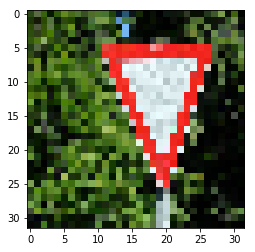

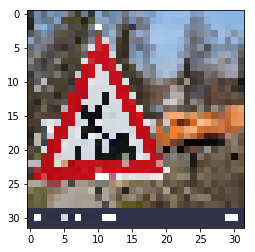

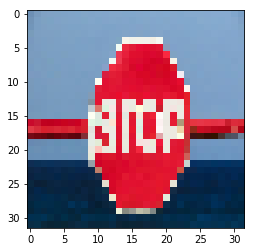

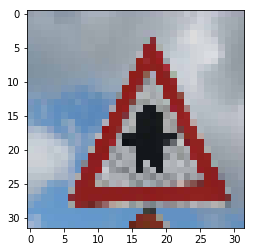

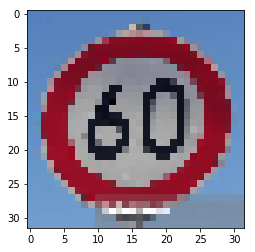

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
images = []

# Read all image into the folder
for filename in os.listdir("from_web"):
    img = Image.open(os.path.join("from_web", filename))
    img = img.resize((32, 32))
    plt.imshow(img)
    plt.show()
    img = np.array(img) / 255
    images.append(img)
    



### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Get the prediction
predictions = model.predict(images)

### Analyze Performance

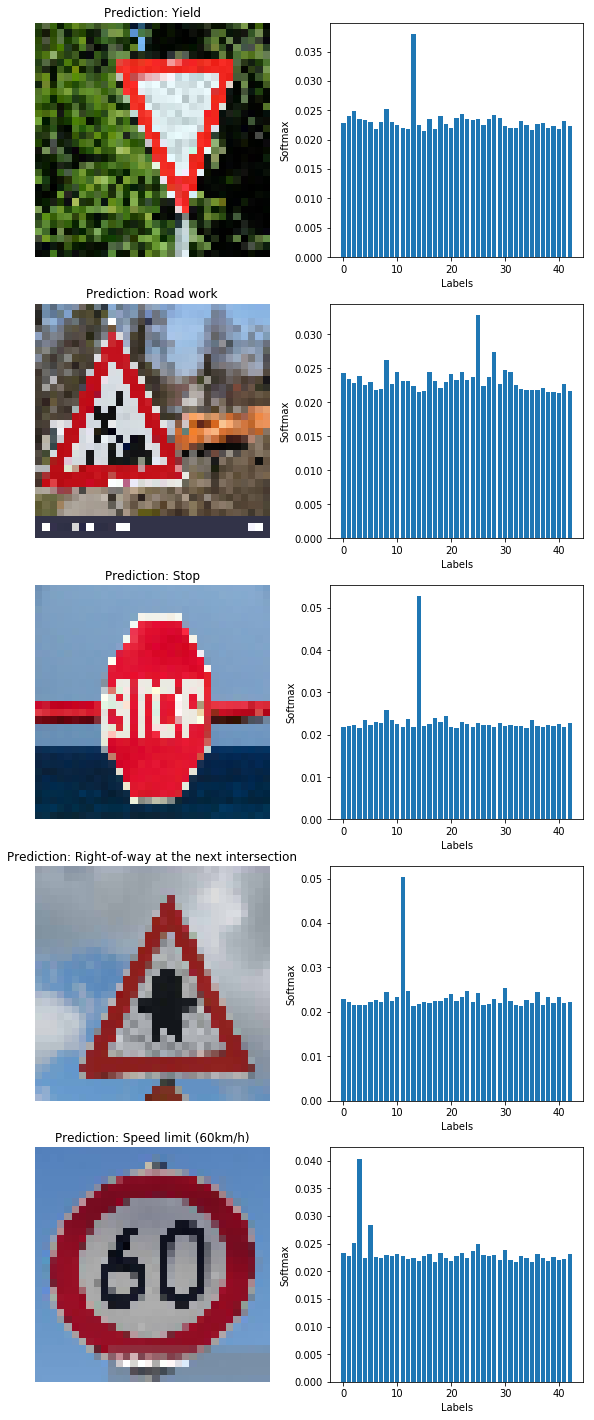

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# Plot the result
fig, axs = plt.subplots(5, 2, figsize=(10, 25))
axs = axs.ravel()
for i in range(10):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(images[i // 2])
        axs[i].set_title("Prediction: %s" % id_to_name[np.argmax(predictions[i // 2])])
    else:
        axs[i].bar(np.arange(43), predictions[i // 2])
        axs[i].set_ylabel("Softmax")
        axs[i].set_xlabel("Labels")

plt.show()



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")